# Are there patterns of violence in terms of location in District 4? How does this compare to the rest of the city?



In [488]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd


In [489]:
df_2015= pd.read_csv("crime_reports/cir_2015.csv")
df_2016= pd.read_csv("crime_reports/cir_2016.csv")
df_2017= pd.read_csv("crime_reports/cir_2017.csv")
df_2018= pd.read_csv("crime_reports/cir_2018.csv")
df_2019= pd.read_csv("crime_reports/cir_2019.csv")
df_2020= pd.read_csv("crime_reports/cir_2020.csv")
df_2021= pd.read_csv("crime_reports/cir_2021.csv")
df_2022= pd.read_csv("crime_reports/cir_2022.csv")
df_2023= pd.read_csv("crime_reports/cir_2023.csv")

/var/folders/5j/_zx7hjn170vdmsjxqzn955gm0000gn/T/ipykernel_83778/3932994242.py:5: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2019= pd.read_csv("crime_reports/cir_2019.csv")
/var/folders/5j/_zx7hjn170vdmsjxqzn955gm0000gn/T/ipykernel_83778/3932994242.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2020= pd.read_csv("crime_reports/cir_2020.csv")
/var/folders/5j/_zx7hjn170vdmsjxqzn955gm0000gn/T/ipykernel_83778/3932994242.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2021= pd.read_csv("crime_reports/cir_2021.csv")
/var/folders/5j/_zx7hjn170vdmsjxqzn955gm0000gn/T/ipykernel_83778/3932994242.py:8: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2022= pd.read_csv("crime_reports/cir_2022.csv")


In [490]:
#combining the datasets of different years
frames = [df_2015,df_2016,df_2017,df_2018,df_2019,df_2020,df_2021,df_2022,df_2023]
df = pd.concat(frames)

In [491]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I172040657,2629,Harassment,HARASSMENT,C11,397,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,MELBOURNE ST,42.291093,-71.065945,"(42.29109287, -71.06594539)"
1,I182061268,3201,Property Lost,PROPERTY - LOST,NaN,,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,BERNARD,NaN,NaN,NaN
2,I162013546,3201,Property Lost,PROPERTY - LOST,B3,433,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,NORFOLK ST,42.283634,-71.082813,"(42.28363434, -71.08281320)"
3,I152051083,3115,Investigate Person,INVESTIGATE PERSON,A7,20,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Three,PARIS ST,42.377023,-71.032247,"(42.37702319, -71.03224730)"
4,I152059178,2647,Other,THREATS TO DO BODILY HARM,C11,359,NaN,2015-06-15 00:00:00,2015,6,Monday,0,Part Two,WASHINGTON ST,42.293606,-71.071887,"(42.29360585, -71.07188650)"


In [492]:
df_new = df[['OFFENSE_CODE','OFFENSE_DESCRIPTION', 'DISTRICT', 'YEAR']].copy()

In [493]:
df_new.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,YEAR
0,2629,HARASSMENT,C11,2015
1,3201,PROPERTY - LOST,NaN,2015
2,3201,PROPERTY - LOST,B3,2015
3,3115,INVESTIGATE PERSON,A7,2015
4,2647,THREATS TO DO BODILY HARM,C11,2015


In [494]:
df_new = df_new.dropna(subset=['DISTRICT'])

In [495]:
#NOW WE WILL ANALYSE THE WHOLE DATA IRRESPECTIVE OF THE DISTRICT

In [496]:
top_15_codes = df_new['OFFENSE_CODE'].value_counts().head(15)

In [497]:
print(top_15_codes)

3115    47054
3831    35855
3006    32792
1402    29813
3114    26553
3410    24757
3301    23218
802     20211
3201    19379
614     18583
613     17986
617     17645
2647    17579
3802    15067
619     13078
Name: OFFENSE_CODE, dtype: int64


In [498]:
top_15_codes_list = top_15_codes.index.tolist()
top_15_descriptions = df_new.loc[df_new['OFFENSE_CODE'].isin(top_15_codes_list), ['OFFENSE_CODE', 'OFFENSE_DESCRIPTION']].drop_duplicates(subset='OFFENSE_CODE')

print(top_15_descriptions)

     OFFENSE_CODE                    OFFENSE_DESCRIPTION
2            3201                        PROPERTY - LOST
3            3115                     INVESTIGATE PERSON
4            2647              THREATS TO DO BODILY HARM
9             614  LARCENY THEFT FROM MV - NON-ACCESSORY
12           1402                              VANDALISM
13            802               ASSAULT SIMPLE - BATTERY
15           3006          SICK/INJURED/MEDICAL - PERSON
16           3410                    TOWED MOTOR VEHICLE
24            619                     LARCENY ALL OTHERS
27            617            LARCENY THEFT FROM BUILDING
33           3114                   INVESTIGATE PROPERTY
78           3301                         VERBAL DISPUTE
89            613                    LARCENY SHOPLIFTING
91           3831  M/V - LEAVING SCENE - PROPERTY DAMAGE
106          3802        M/V ACCIDENT - PROPERTY  DAMAGE


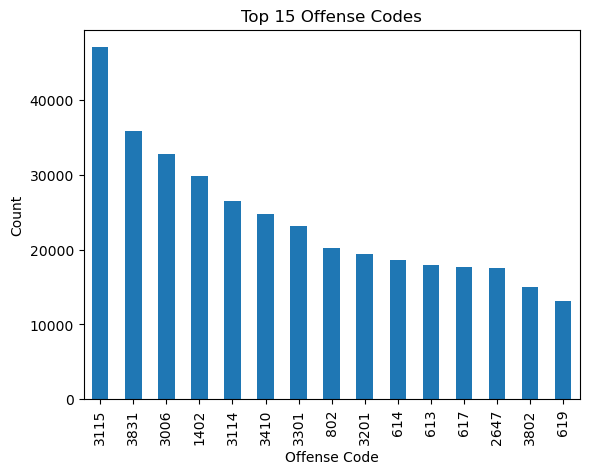

In [499]:
top_15_codes = df_new['OFFENSE_CODE'].value_counts().head(15)
top_15_codes.plot.bar()
plt.title('Top 15 Offense Codes')
plt.xlabel('Offense Code')
plt.ylabel('Count')
plt.show()

- The above graph shows the bar graph for the most occuring top 15 offences in the city of Boston
- The x-axis shows the codes of the most occuring offences and the y-axis shows their counts.
- It can be seen that 3115 (INVESTIGATE PERSON) is the most frequently happening offense in the city of Boston while 619 (LARCENY ALL OTHERS) is the least occuring offense. 

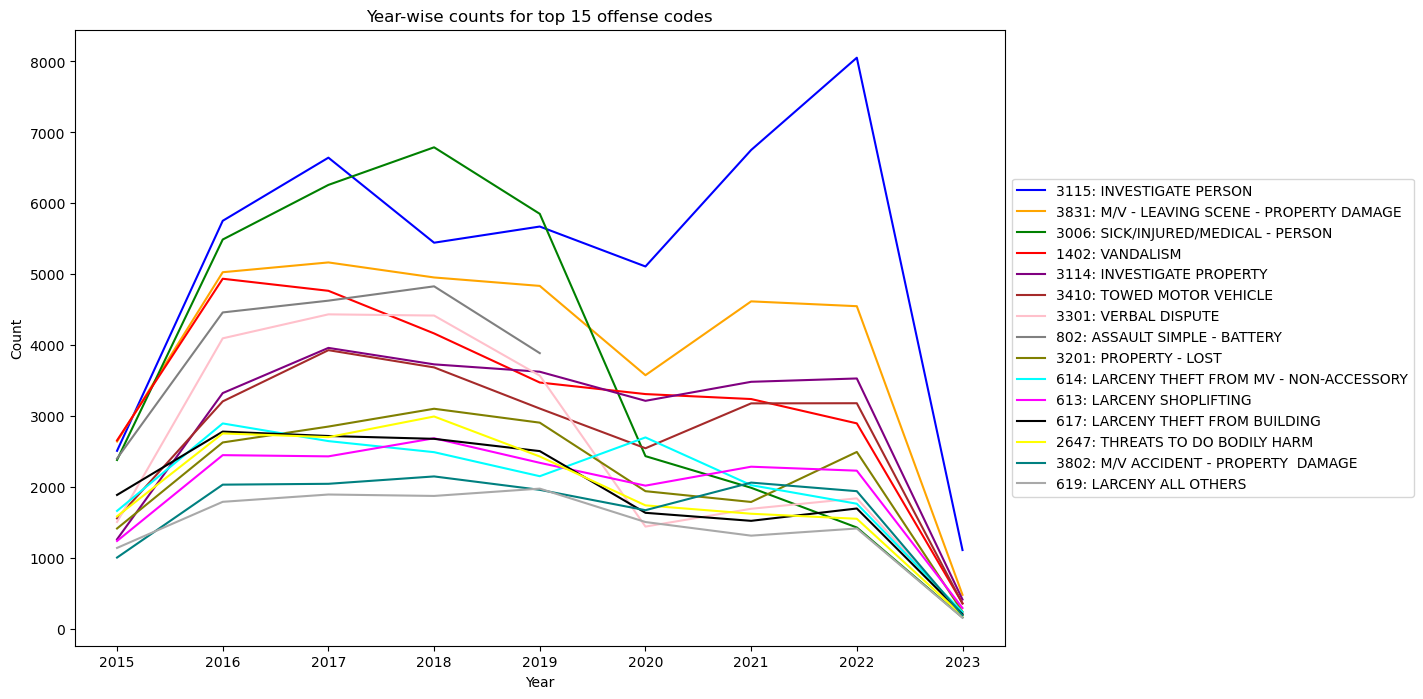

In [549]:
# Get the top 15 offense codes
top_15_codes = df_new['OFFENSE_CODE'].value_counts().head(15)

# Define a list of colors
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'black', 'yellow', 'teal', 'darkgray']

# Filter the DataFrame for the top 15 codes
offense_df = df_new[df_new['OFFENSE_CODE'].isin(top_15_codes.index)]

# Group the DataFrame by year and offense code, and count the number of occurrences
grouped = offense_df.groupby(['YEAR', 'OFFENSE_CODE']).size().reset_index(name='COUNT')

# Pivot the data to have each offense code as a separate column
pivoted = grouped.pivot(index='YEAR', columns='OFFENSE_CODE', values='COUNT')

# Plot the line graph for each offense code
for i, code in enumerate(top_15_codes.index):
    plt.plot(pivoted[code], label=f"{code}: {df_new[df_new['OFFENSE_CODE'] == code]['OFFENSE_DESCRIPTION'].iloc[0]}", color=colors[i])

# Set the title and axis labels
plt.title('Year-wise counts for top 15 offense codes')
plt.xlabel('Year')
plt.ylabel('Count')

# Add a legend and show the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the figure size
plt.gcf().set_size_inches(12,8)
plt.show()


- The above graph shows the line graph for the most occuring top 15 offences for the years from 2015 to 2023 in the city of Boston
- The x-axis shows the years and the y-axis shows the count of offenses with different line colours depicting different offense codes.
- It can be seen that 3115 (INVESTIGATE PERSON) is the most frequently happening offense in the city of Boston for most of the time.
- There is also a drastic decrease in Sick/Injured/Medical persons since year 2019

In [ ]:
#concentrating on only firearm or weapon use whole boston Irrespective of the districts

In [502]:
firearm_df = df_new[df_new['OFFENSE_DESCRIPTION'].str.contains('FIREARM')]
firearm_codes = firearm_df['OFFENSE_CODE']
print(firearm_codes.unique())

[1501 3119 1510 3016 3203 1503 1502]


In [503]:
# Define the list of offense codes
selected_offense_codes = [1501,3119,1510,3016,3203,1503,1502]

# Filter the original DataFrame to get rows with the specified offense codes
offense_df = df_new[df_new['OFFENSE_CODE'].isin(selected_offense_codes)]

# Count the occurrences of each offense code
offense_counts = offense_df['OFFENSE_CODE'].value_counts()

# Print the count of each offense code
print(offense_counts)


1501    2203
3119    1425
1503     794
1510     273
3203      30
3016      18
1502      16
Name: OFFENSE_CODE, dtype: int64


In [504]:
offense_codes = [1501,3119,1510,3016,3203,1503,1502]
offense_df = df_new[df_new['OFFENSE_CODE'].isin(offense_codes)]

# Drop duplicates and select the 'OFFENSE_CODE' and 'OFFENSE_DESCRIPTION' columns
offense_descriptions = offense_df[['OFFENSE_CODE', 'OFFENSE_DESCRIPTION']].drop_duplicates()

# Print the descriptions for each offense code
for code in set(offense_codes):
    if code in offense_descriptions['OFFENSE_CODE'].values:
        description = offense_descriptions[offense_descriptions['OFFENSE_CODE'] == code]['OFFENSE_DESCRIPTION'].values[0]
        count = len(offense_df[offense_df['OFFENSE_CODE'] == code])
        print(f"{code}: {description} ({count})")



3203: FIREARM/WEAPON - LOST (30)
1510: WEAPON - FIREARM - OTHER VIOLATION (273)
3016: FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH (18)
3119: FIREARM/WEAPON - FOUND OR CONFISCATED (1425)
1501: WEAPON - FIREARM - CARRYING / POSSESSING, ETC (2203)
1502: WEAPON - FIREARM - SALE / TRAFFICKING (16)
1503: WEAPON - OTHER - CARRYING / POSSESSING, ETC (794)


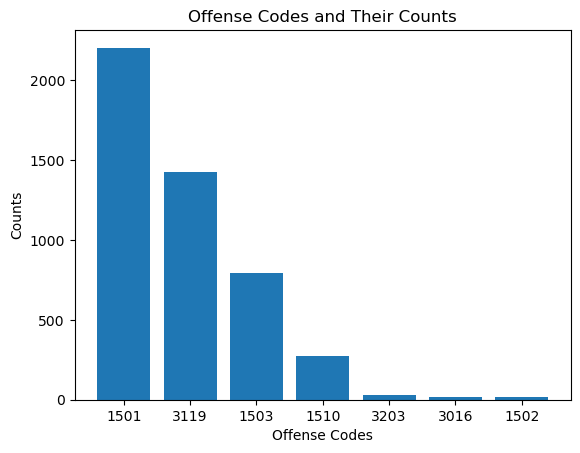

In [505]:
# Filter the DataFrame for the given offense codes
offense_df = df_new[df_new['OFFENSE_CODE'].isin(selected_offense_codes)]

# Count the occurrences of each offense code
offense_counts = offense_df['OFFENSE_CODE'].value_counts()

# Sort the counts in descending order
offense_counts = offense_counts.sort_values(ascending=False)

# Create a bar chart of the offense codes and their counts
plt.bar(offense_counts.index.astype(str), offense_counts.values)

# Set the title and axis labels
plt.title('Offense Codes and Their Counts')
plt.xlabel('Offense Codes')
plt.ylabel('Counts')

# Show the plot
plt.show()

- The above bar graph depicts the number of offences for the codes specific to gun violences
- It can be seen that 1501 (WEAPON - FIREARM - CARRYING / POSSESSING) is the most occuring gun violence offense while 1502 (WEAPON - FIREARM - SALE / TRAFFICKING) is the least occuring gun violence offense.

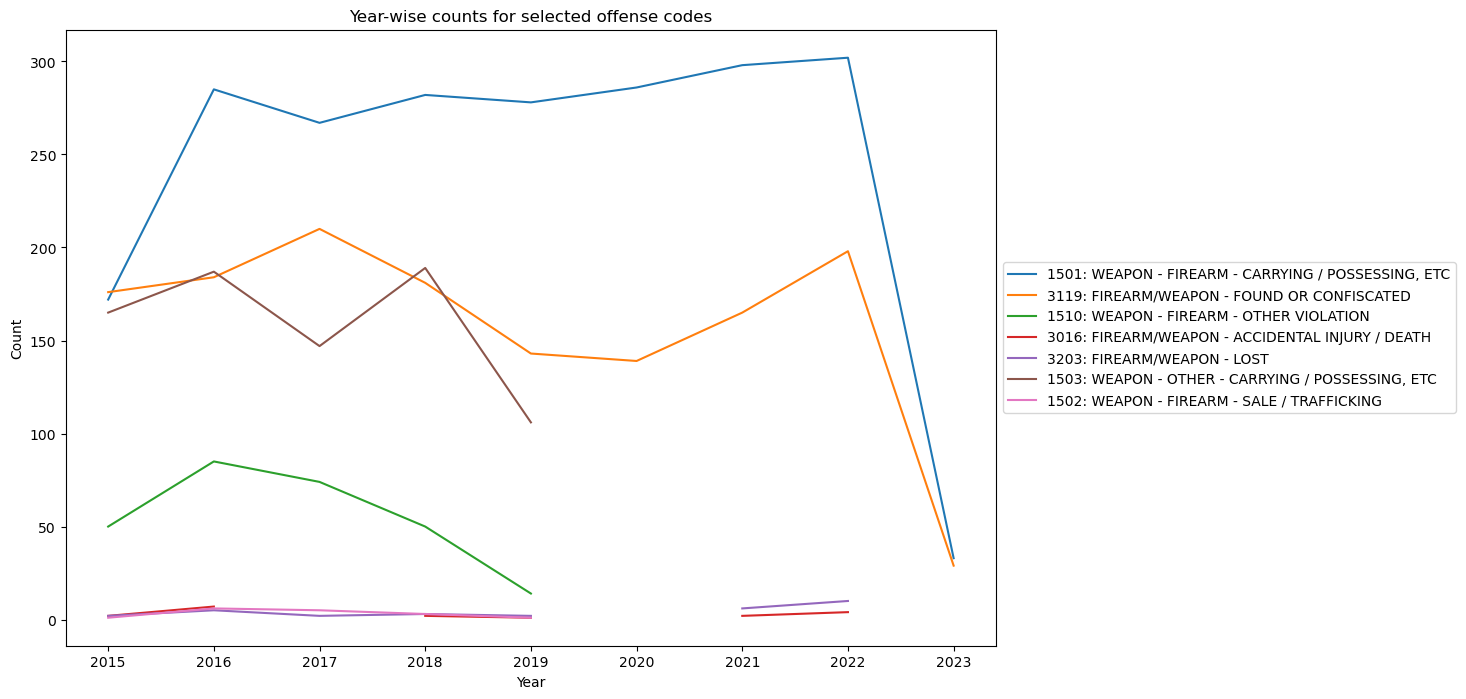

In [506]:
offense_codes = [1501,3119,1510,3016,3203,1503,1502]

# Filter the DataFrame for the given offense codes
offense_df = df_new[df_new['OFFENSE_CODE'].isin(offense_codes)]

# Group the DataFrame by year and offense code, and count the number of occurrences
grouped = offense_df.groupby(['YEAR', 'OFFENSE_CODE']).size().reset_index(name='COUNT')

# Pivot the data to have each offense code as a separate column
pivoted = grouped.pivot(index='YEAR', columns='OFFENSE_CODE', values='COUNT')

# Create a line graph for each offense code
for code in offense_codes:
    plt.plot(pivoted[code], label=f"{code}: {offense_descriptions[offense_descriptions['OFFENSE_CODE'] == code]['OFFENSE_DESCRIPTION'].values[0]}")

# Set the title and axis labels
plt.title('Year-wise counts for selected offense codes')
plt.xlabel('Year')
plt.ylabel('Count')

# Set the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the figure size
plt.gcf().set_size_inches(12,8)

# Show the graph
plt.show()


- The above graph shows the line graph for the gun violence offense codes for the years from 2015 to 2023 in the city of Boston
- The x-axis shows the years and the y-axis shows the count of offenses with different line colours depicting different offense codes.
- It can be seen that 1501 (WEAPON - FIREARM - CARRYING / POSSESSING) is the most frequently happening offense in the city of Boston.

In [507]:
#Concentrating only on District c-11,B-2,B-3

In [508]:
df_d4 = df_new[df_new['DISTRICT'].isin(['C11', 'B2', 'B3'])].copy()


In [509]:
df_d4.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,YEAR
0,2629,HARASSMENT,C11,2015
2,3201,PROPERTY - LOST,B3,2015
4,2647,THREATS TO DO BODILY HARM,C11,2015
5,3201,PROPERTY - LOST,B2,2015
6,1106,FRAUD - CREDIT CARD / ATM FRAUD,B3,2015


In [510]:
top_15_codes_d4 = df_d4['OFFENSE_CODE'].value_counts().head(15)
print(top_15_codes_d4)

3115    18978
3831    16182
3301    13972
1402    12984
3006    11939
3114    11123
2647     8491
802      8397
3410     7025
3802     6326
3201     6257
614      6123
3502     5760
3803     4605
619      4422
Name: OFFENSE_CODE, dtype: int64


In [511]:
top_15_codes_list_d4 = top_15_codes_d4.index.tolist()

top_15_descriptions_d4 = df_d4.loc[df_d4['OFFENSE_CODE'].isin(top_15_codes_list_d4), ['OFFENSE_CODE', 'OFFENSE_DESCRIPTION']].drop_duplicates()

print(top_15_descriptions_d4)

       OFFENSE_CODE                          OFFENSE_DESCRIPTION
2              3201                              PROPERTY - LOST
4              2647                    THREATS TO DO BODILY HARM
16             3410                          TOWED MOTOR VEHICLE
30             3115                           INVESTIGATE PERSON
33             3114                         INVESTIGATE PROPERTY
35             1402                                    VANDALISM
37             3006                SICK/INJURED/MEDICAL - PERSON
60              619                           LARCENY ALL OTHERS
91             3831        M/V - LEAVING SCENE - PROPERTY DAMAGE
98              802                     ASSAULT SIMPLE - BATTERY
142            3301                               VERBAL DISPUTE
208            3502                     MISSING PERSON - LOCATED
267            3803               M/V ACCIDENT - PERSONAL INJURY
284            3802              M/V ACCIDENT - PROPERTY  DAMAGE
683             614      

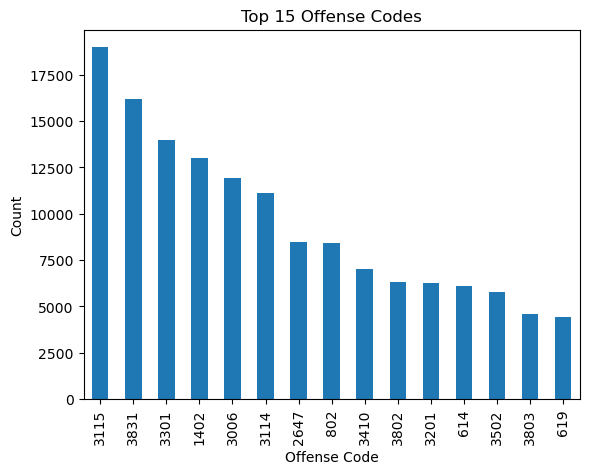

In [512]:
top_15_codes_d4 = df_d4['OFFENSE_CODE'].value_counts().head(15)
top_15_codes_d4.plot.bar()
plt.title('Top 15 Offense Codes')
plt.xlabel('Offense Code')
plt.ylabel('Count')
plt.show()

- The above graph shows the bar graph for the most occuring top 15 offences for the city council district 4.
- The x-axis shows the codes of the most occuring offences and the y-axis shows their counts.
- It can be seen that 3115 (INVESTIGATE PERSON) is the most frequently happening offense in the city of Boston while 619 (LARCENY ALL OTHERS) is the least occuring offense. 

In [513]:
# Define the list of offense codes
selected_offense_codes = [1501,3119,1510,3016,3203,1503,1502]

# Filter the original DataFrame to get rows with the specified offense codes
offense_df_d4 = df_d4[df_d4['OFFENSE_CODE'].isin(selected_offense_codes)]

# Count the occurrences of each offense code
offense_counts_d4 = offense_df_d4['OFFENSE_CODE'].value_counts()

# Print the count of each offense code
print(offense_counts_d4)



1501    1454
3119     724
1503     318
1510     175
3203      15
1502       8
3016       7
Name: OFFENSE_CODE, dtype: int64


In [514]:
offense_codes = [1501,3119,1510,3016,3203,1503,1502]
offense_d4 = df_d4[df_d4['OFFENSE_CODE'].isin(offense_codes)]

# Drop duplicates and select the 'OFFENSE_CODE' and 'OFFENSE_DESCRIPTION' columns
offense_descriptions_d4 = offense_df_d4[['OFFENSE_CODE', 'OFFENSE_DESCRIPTION']].drop_duplicates()

# Print the descriptions for each offense code
for code in set(offense_codes):
    if code in offense_descriptions_d4['OFFENSE_CODE'].values:
        description = offense_descriptions_d4[offense_descriptions_d4['OFFENSE_CODE'] == code]['OFFENSE_DESCRIPTION'].values[0]
        count = len(offense_df_d4[offense_df_d4['OFFENSE_CODE'] == code])
        print(f"{code}: {description} ({count})")





3203: FIREARM/WEAPON - LOST (15)
1510: WEAPON - FIREARM - OTHER VIOLATION (175)
3016: FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH (7)
3119: FIREARM/WEAPON - FOUND OR CONFISCATED (724)
1501: WEAPON - FIREARM - CARRYING / POSSESSING, ETC (1454)
1502: WEAPON - FIREARM - SALE / TRAFFICKING (8)
1503: WEAPON - OTHER - CARRYING / POSSESSING, ETC (318)


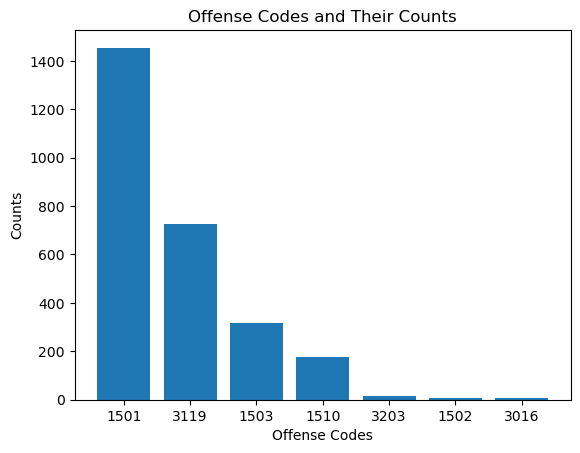

In [515]:
offense_codes = [1501,3119,1510,3016,3203,1503,1502]
# Filter the DataFrame for the given offense codes
offense_df_d4 = df_d4[df_d4['OFFENSE_CODE'].isin(offense_codes)]

# Count the occurrences of each offense code
offense_counts_d4 = offense_df_d4['OFFENSE_CODE'].value_counts()

# Sort the counts in descending order
offense_counts_d4 = offense_counts_d4.sort_values(ascending=False)

# Create a bar chart of the offense codes and their counts
plt.bar(offense_counts_d4.index.astype(str), offense_counts_d4.values)

# Set the title and axis labels
plt.title('Offense Codes and Their Counts')
plt.xlabel('Offense Codes')
plt.ylabel('Counts')

# Show the plot
plt.show()



- The above bar graph depicts the number of offences for the codes specific to gun violences in the city council district 4
- It can be seen that 1501 (WEAPON - FIREARM - CARRYING / POSSESSING) is the most occuring gun violence offense while 3016 (WEAPON - FIREARM - ACCIDENTAL INJURY / DEATH) is the least occuring gun violence offense.

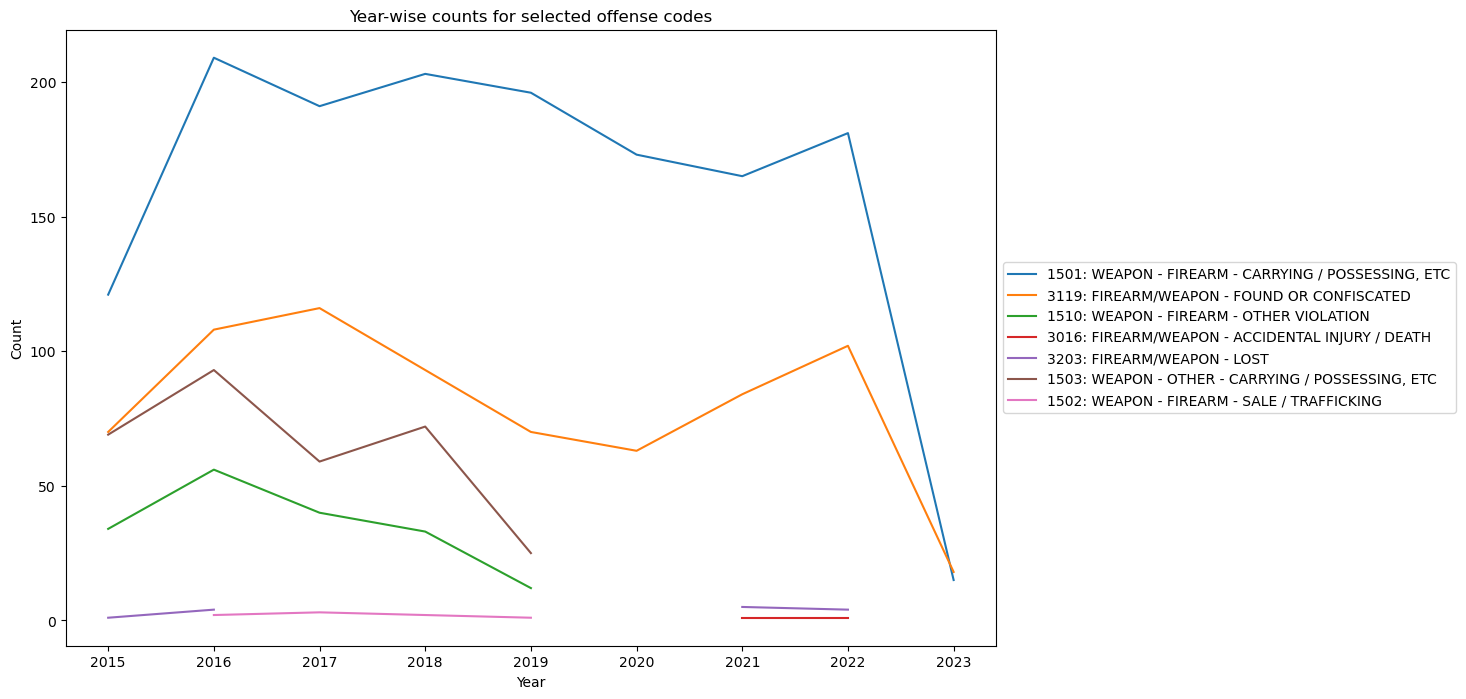

In [516]:
offense_codes_d4 = [1501,3119,1510,3016,3203,1503,1502]


grouped_d4 = offense_df_d4.groupby(['YEAR', 'OFFENSE_CODE']).size().reset_index(name='COUNT')

pivoted_d4 = grouped_d4.pivot(index='YEAR', columns='OFFENSE_CODE', values='COUNT')

# Create a line graph for each offense code
for code in offense_codes_d4:
    plt.plot(pivoted_d4[code], label=f"{code}: {offense_descriptions_d4[offense_descriptions_d4['OFFENSE_CODE'] == code]['OFFENSE_DESCRIPTION'].values[0]}")

# Set the title and axis labels
plt.title('Year-wise counts for selected offense codes')
plt.xlabel('Year')
plt.ylabel('Count')

# Set the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the figure size
plt.gcf().set_size_inches(12,8)

# Show the graph
plt.show()



- The above graph shows the line graph for the gun violence offense codes for the years from 2015 to 2023 in the city council district 4.
- The x-axis shows the years and the y-axis shows the count of offenses with different line colours depicting different offense codes.
- It can be seen that 1501 (WEAPON - FIREARM - CARRYING / POSSESSING) is the most frequently happening offense in the city council district 4.

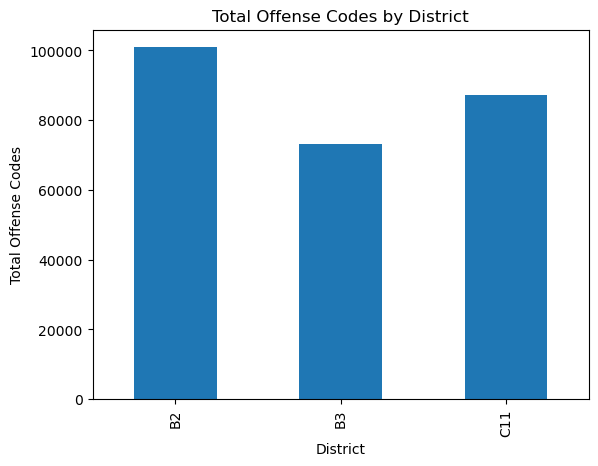

In [517]:
# Group the data by district and count the unique offense codes in each group
district_counts = df_d4.groupby('DISTRICT')['OFFENSE_CODE'].count()

# Create a bar plot of the district counts
district_counts.plot.bar()
plt.title('Total Offense Codes by District')
plt.xlabel('District')
plt.ylabel('Total Offense Codes')
plt.show()


- The above graph shows the total number of offenses in the various locations (B2, B3 and C11) of city council district 4.
- It can be seen that B2 (Roxbury) has the highest number of offenses within the district 4, while B3 (Mattapan) has the least number of offenses.

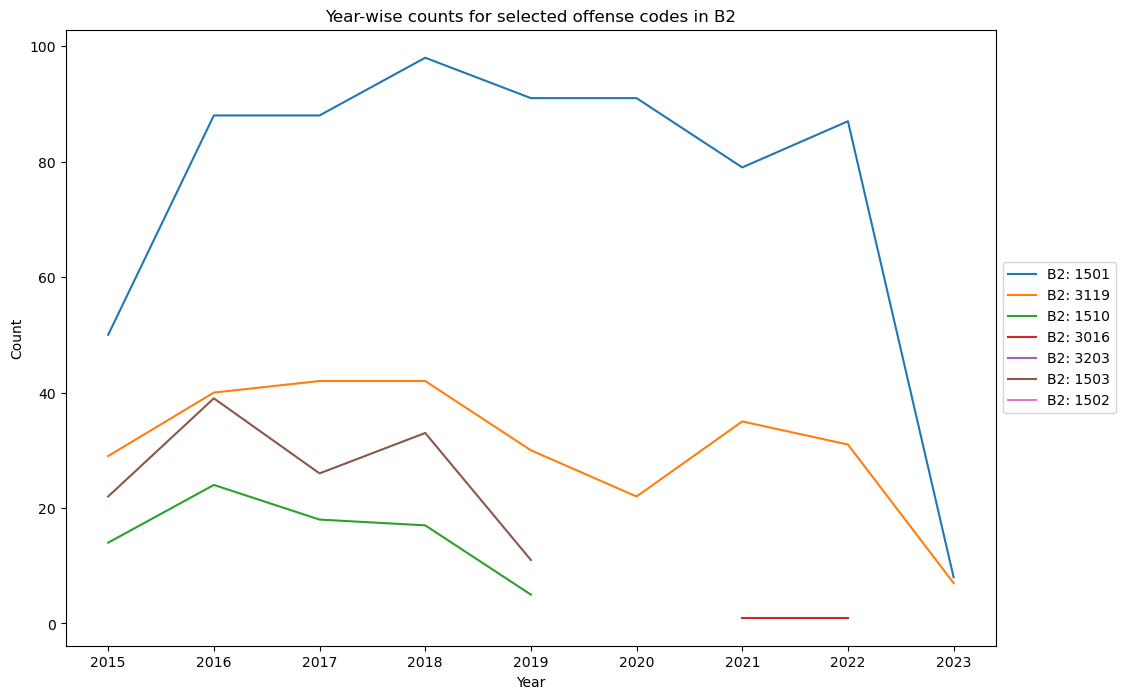

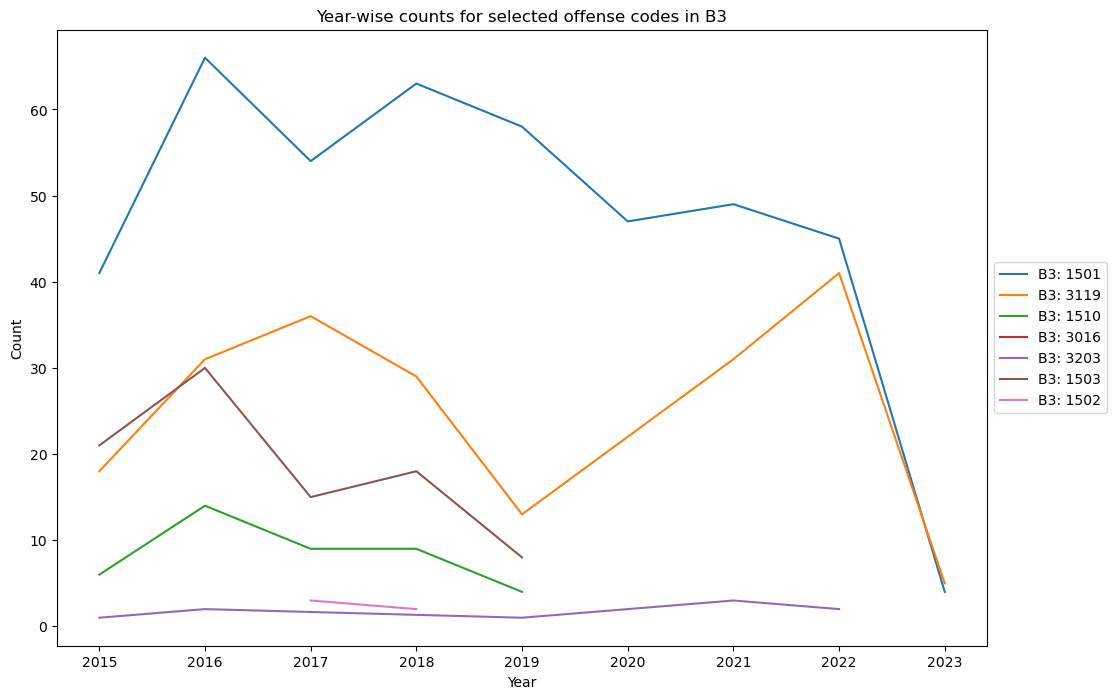

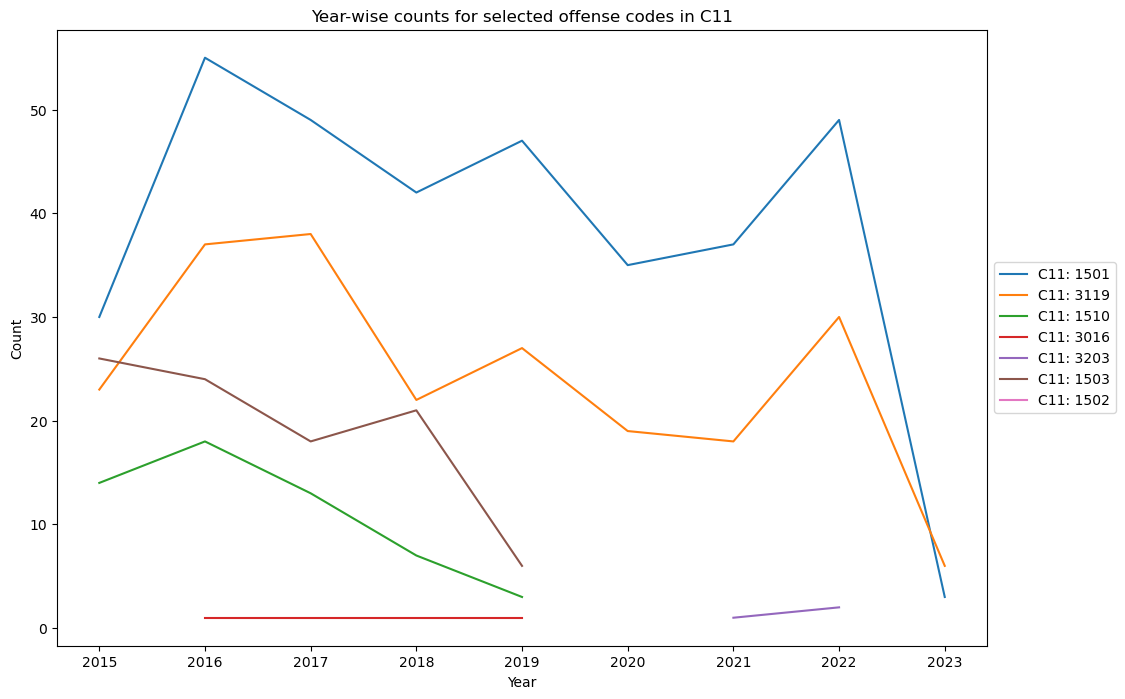

In [518]:
offense_codes_d4 = [1501,3119,1510,3016,3203,1503,1502]

# Filter the DataFrame for the given districts and offense codes
offense_df_d4 = df_d4[(df_d4['DISTRICT'].isin(['B2', 'B3', 'C11'])) & (df_d4['OFFENSE_CODE'].isin(offense_codes_d4))]

# Group the DataFrame by district, year, and offense code, and count the number of occurrences
grouped_d4 = offense_df_d4.groupby(['DISTRICT', 'YEAR', 'OFFENSE_CODE']).size().reset_index(name='COUNT')

# Pivot the data to have each district as a separate column
pivoted_d4 = grouped_d4.pivot(index=['YEAR', 'OFFENSE_CODE'], columns='DISTRICT', values='COUNT')

# Loop over each district and create a line graph for each offense code
for district in ['B2', 'B3', 'C11']:
    fig, ax = plt.subplots()
    for code in offense_codes_d4:
        ax.plot(pivoted_d4.loc[(slice(None), code), district].reset_index()['YEAR'], pivoted_d4.loc[(slice(None), code), district].values, label=f"{district}: {code}")
    ax.set_title(f"Year-wise counts for selected offense codes in {district}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Set the figure size
    plt.gcf().set_size_inches(12,8)
    #ax.legend()
    plt.show()


- The above graphs shows the line graph for the gun violence offense codes for the years from 2015 to 2023 in the locations B2, B3 and C11 of district 4. 
- The x-axis shows the years and the y-axis shows the count of offenses with different line colours depicting different offense codes. 

In [519]:
df_nd4 = df_new[~df_new['DISTRICT'].isin(['C11', 'B2', 'B3'])].copy()
df_nd4.head()

,OFFENSE_CODE,OFFENSE_DESCRIPTION,DISTRICT,YEAR
3,3115,INVESTIGATE PERSON,A7,2015
7,3130,SEARCH WARRANT,A7,2015
8,1102,FRAUD - FALSE PRETENSE / SCHEME,A1,2015
9,614,LARCENY THEFT FROM MV - NON-ACCESSORY,D4,2015
12,1402,VANDALISM,E18,2015


In [520]:
top_15_codes_nd4 = df_nd4['OFFENSE_CODE'].value_counts().head(15)
print(top_15_codes_nd4)

3115    28076
3006    20853
3831    19673
3410    17732
1402    16829
3114    15430
613     14406
617     13252
3201    13122
614     12460
802     11814
3301     9246
2647     9088
3802     8741
619      8656
Name: OFFENSE_CODE, dtype: int64


In [521]:
top_15_codes_list_nd4 = top_15_codes_nd4.index.tolist()

top_15_descriptions_nd4 = df_nd4.loc[df_nd4['OFFENSE_CODE'].isin(top_15_codes_list_nd4), ['OFFENSE_CODE', 'OFFENSE_DESCRIPTION']].drop_duplicates()

print(top_15_descriptions_nd4)

       OFFENSE_CODE                    OFFENSE_DESCRIPTION
3              3115                     INVESTIGATE PERSON
9               614  LARCENY THEFT FROM MV - NON-ACCESSORY
12             1402                              VANDALISM
13              802               ASSAULT SIMPLE - BATTERY
15             3006          SICK/INJURED/MEDICAL - PERSON
24              619                     LARCENY ALL OTHERS
27              617            LARCENY THEFT FROM BUILDING
31             3201                        PROPERTY - LOST
40             3410                    TOWED MOTOR VEHICLE
41             3114                   INVESTIGATE PROPERTY
78             3301                         VERBAL DISPUTE
79             2647              THREATS TO DO BODILY HARM
89              613                    LARCENY SHOPLIFTING
106            3802        M/V ACCIDENT - PROPERTY  DAMAGE
145            3831  M/V - LEAVING SCENE - PROPERTY DAMAGE
18750           619              LARCENY OTHER $200 & OV

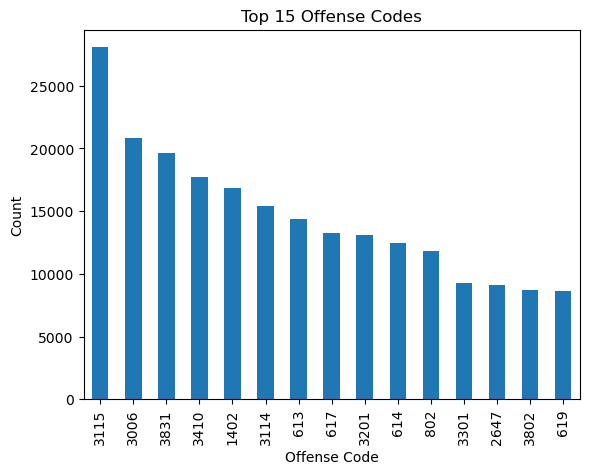

In [550]:
top_15_codes_nd4 = df_nd4['OFFENSE_CODE'].value_counts().head(15)
top_15_codes_nd4.plot.bar()
plt.title('Top 15 Offense Codes')
plt.xlabel('Offense Code')
plt.ylabel('Count')
plt.show()

- The above graph shows the bar graph for the most occuring top 15 offences for the city of Boston except for the district 4.
- The x-axis shows the codes of the most occuring offences and the y-axis shows their counts.
- It can be seen that 3115 (INVESTIGATE PERSON) is the most frequently happening offense in the city of Boston  except for the district 4 while 619 (LARCENY ALL OTHERS) is the least occuring offense. 

In [529]:
# Define the list of offense codes
selected_offense_codes = [1501,3119,1510,3016,3203,1503,1502]
# Filter the original DataFrame to get rows with the specified offense codes
offense_df_nd4 = df_nd4[df_nd4['OFFENSE_CODE'].isin(selected_offense_codes)]

# Count the occurrences of each offense code
offense_counts_nd4 = offense_df_nd4['OFFENSE_CODE'].value_counts()

# Print the count of each offense code
print(offense_counts_nd4)



1501    749
3119    701
1503    476
1510     98
3203     15
3016     11
1502      8
Name: OFFENSE_CODE, dtype: int64


In [534]:
offense_codes = [1501,3119,1510,3016,3203,1503,1502]
offense_df_nd4 = df_nd4[df_nd4['OFFENSE_CODE'].isin(offense_codes)]

# Drop duplicates and select the 'OFFENSE_CODE' and 'OFFENSE_DESCRIPTION' columns
offense_descriptions_nd4 = offense_df_nd4[['OFFENSE_CODE', 'OFFENSE_DESCRIPTION']].drop_duplicates()

# Print the descriptions for each offense code
for code in set(offense_codes):
    if code in offense_descriptions_nd4['OFFENSE_CODE'].values:
        description = offense_descriptions_nd4[offense_descriptions_nd4['OFFENSE_CODE'] == code]['OFFENSE_DESCRIPTION'].values[0]
        count = len(offense_df_nd4[offense_df_nd4['OFFENSE_CODE'] == code])
        print(f"{code}: {description} ({count})")



3203: FIREARM/WEAPON - LOST (15)
1510: WEAPON - FIREARM - OTHER VIOLATION (98)
3016: FIREARM/WEAPON - ACCIDENTAL INJURY / DEATH (11)
3119: FIREARM/WEAPON - FOUND OR CONFISCATED (701)
1501: WEAPON - FIREARM - CARRYING / POSSESSING, ETC (749)
1502: WEAPON - FIREARM - SALE / TRAFFICKING (8)
1503: WEAPON - OTHER - CARRYING / POSSESSING, ETC (476)


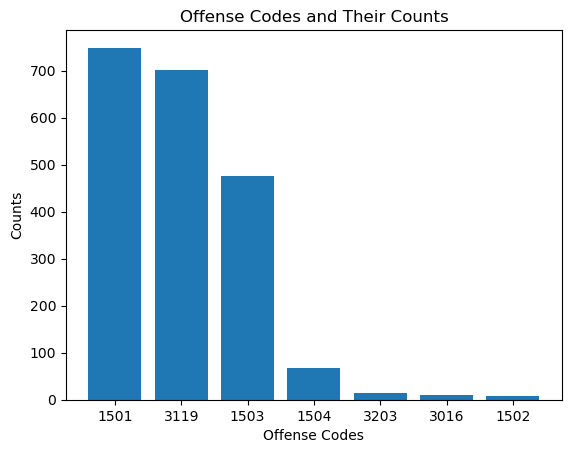

In [551]:
offense_codes = [1504,3203,3016,3119,1501,1502,1503]
# Filter the DataFrame for the given offense codes
offense_df_nd4 = df_nd4[df_nd4['OFFENSE_CODE'].isin(offense_codes)]

# Count the occurrences of each offense code
offense_counts_nd4 = offense_df_nd4['OFFENSE_CODE'].value_counts()

# Sort the counts in descending order
offense_counts_nd4 = offense_counts_nd4.sort_values(ascending=False)

# Create a bar chart of the offense codes and their counts
plt.bar(offense_counts_nd4.index.astype(str), offense_counts_nd4.values)

# Set the title and axis labels
plt.title('Offense Codes and Their Counts')
plt.xlabel('Offense Codes')
plt.ylabel('Counts')

# Show the plot
plt.show()



- The above bar graph depicts the number of offences for the codes specific to gun violences in the city of boston except the district 4.
- It can be seen that 1501 (WEAPON - FIREARM - CARRYING / POSSESSING) is the most occuring gun violence offense while 1502 (WEAPON - FIREARM - SALE / TRAFFICKING) is the least occuring gun violence offense.

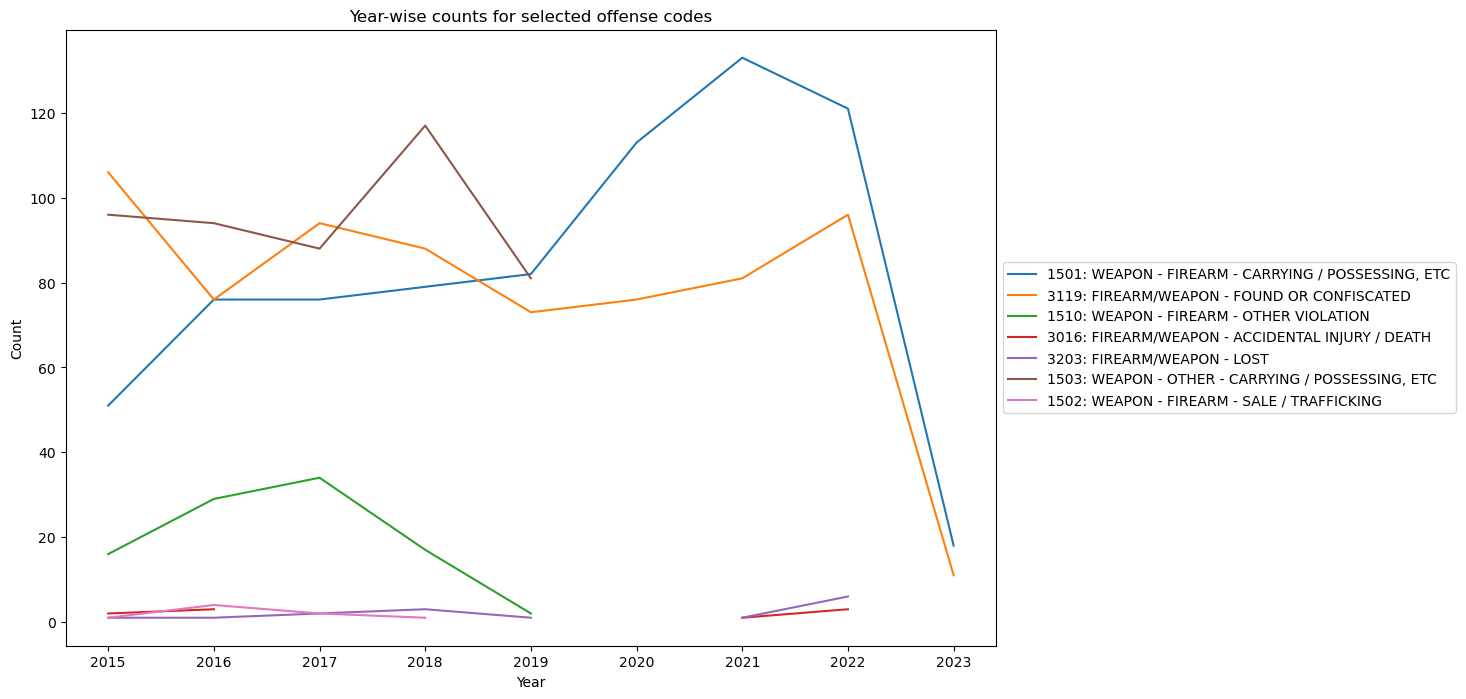

In [535]:
offense_codes_nd4 = [1501,3119,1510,3016,3203,1503,1502]


grouped_nd4 = offense_df_nd4.groupby(['YEAR', 'OFFENSE_CODE']).size().reset_index(name='COUNT')

pivoted_nd4 = grouped_nd4.pivot(index='YEAR', columns='OFFENSE_CODE', values='COUNT')

# Create a line graph for each offense code
for code in offense_codes_nd4:
    plt.plot(pivoted_nd4[code], label=f"{code}: {offense_descriptions_nd4[offense_descriptions_nd4['OFFENSE_CODE'] == code]['OFFENSE_DESCRIPTION'].values[0]}")

# Set the title and axis labels
plt.title('Year-wise counts for selected offense codes')
plt.xlabel('Year')
plt.ylabel('Count')

# Set the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Set the figure size
plt.gcf().set_size_inches(12,8)

# Show the graph
plt.show()




- The above graph shows the line graph for the gun violence offense codes for the years from 2015 to 2023 in the city of boston except for the district 4.
- The x-axis shows the years and the y-axis shows the count of offenses with different line colours depicting different offense codes.
- It can be seen that 1503 (WEAPON - OTHER - CARRYING / POSSESSING, ETC) is the most frequently happening offense till 2019 and later 1501 (WEAPON - FIREARM - CARRYING / POSSESSING) is the most frequently happening offense.

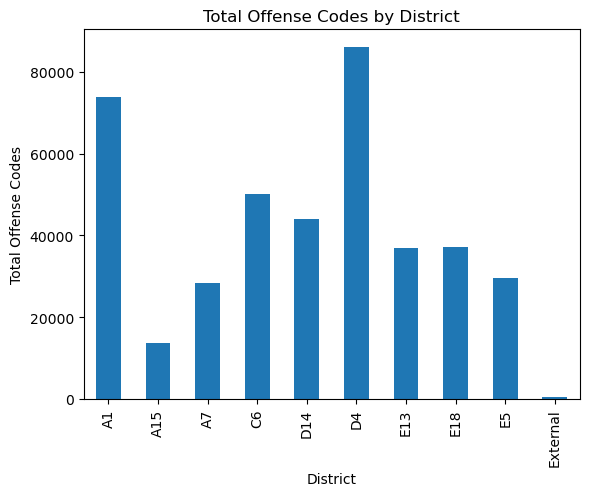

In [536]:
# Group the data by district and count the unique offense codes in each group
district_counts = df_nd4.groupby('DISTRICT')['OFFENSE_CODE'].count()

# Create a bar plot of the district counts
district_counts.plot.bar()
plt.title('Total Offense Codes by District')
plt.xlabel('District')
plt.ylabel('Total Offense Codes')
plt.show()


- The above graph shows the total number of violences in the all the districts of Boston expect for the district 4.
- The x-axis shows the district names and y-axis shows the total number of offences. 

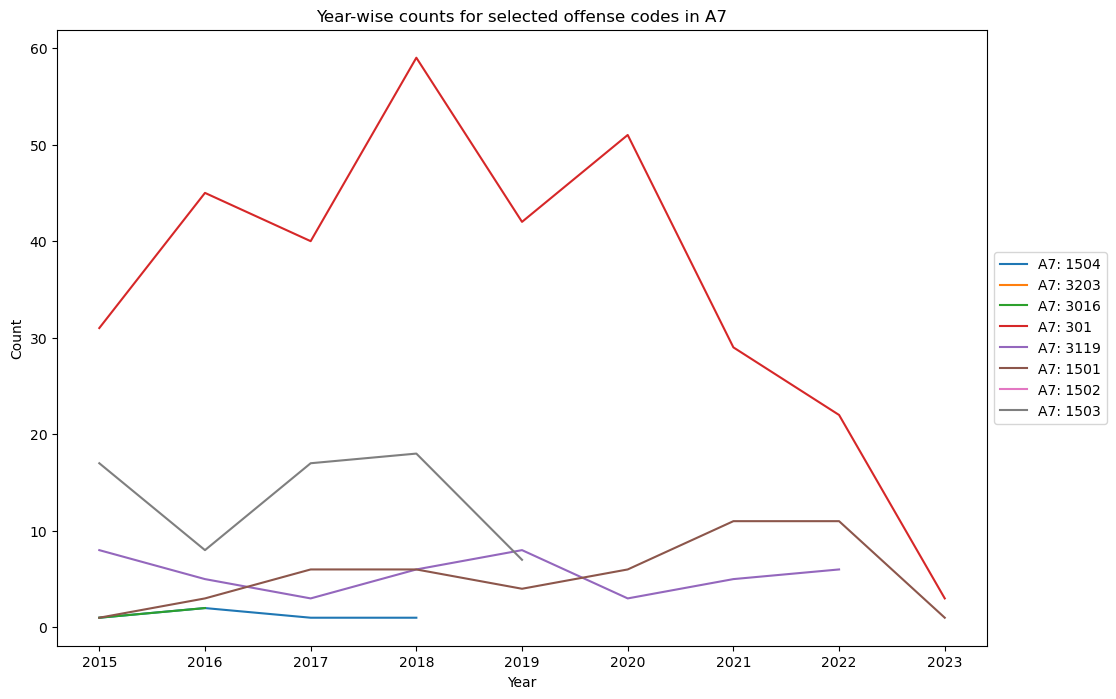

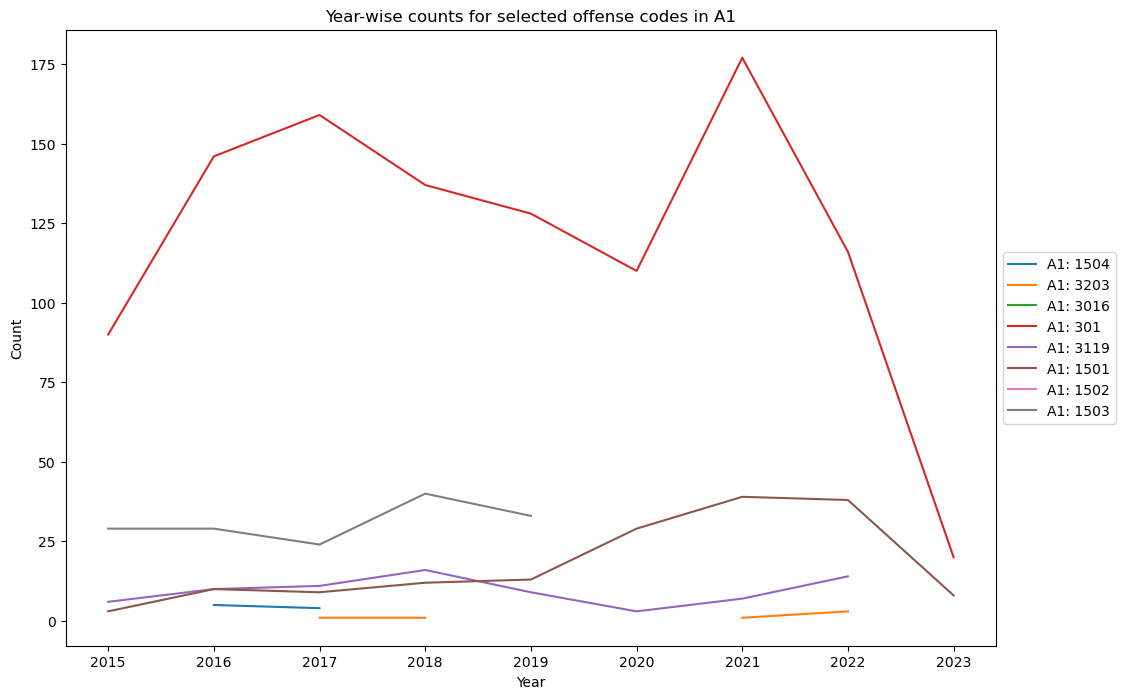

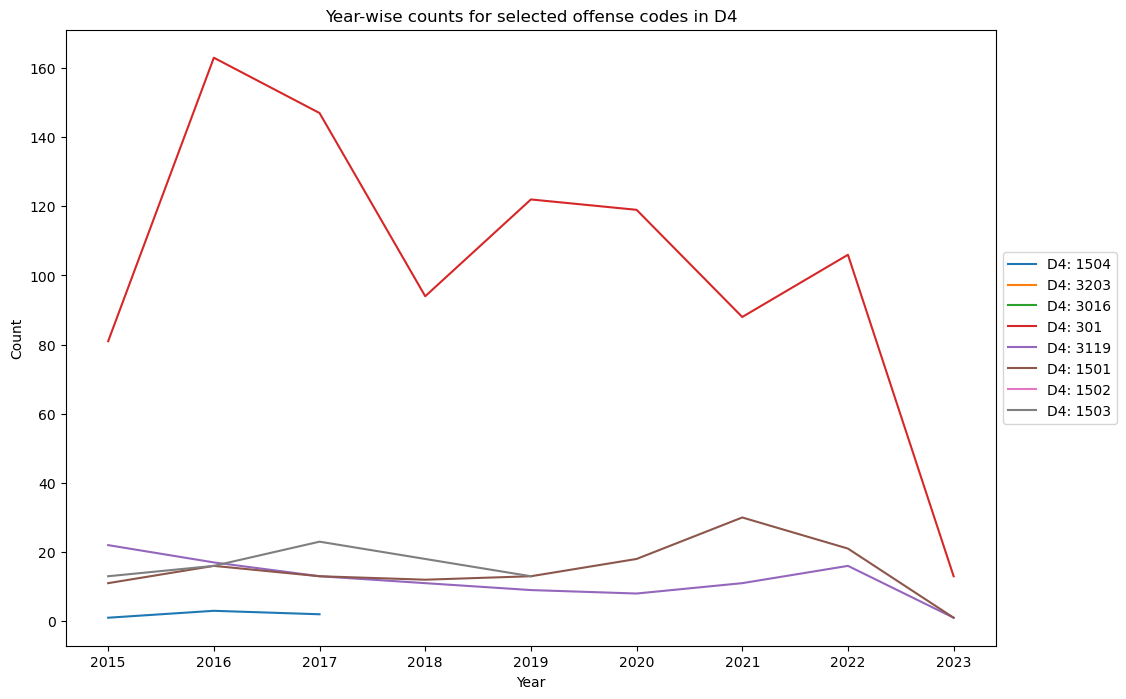

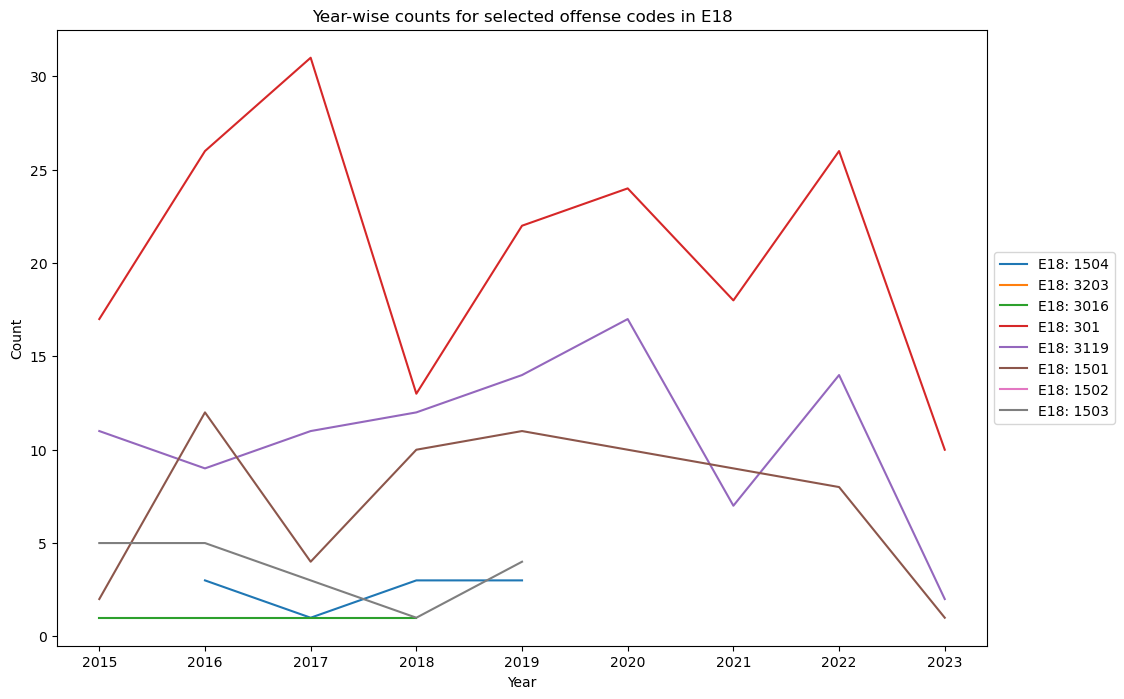

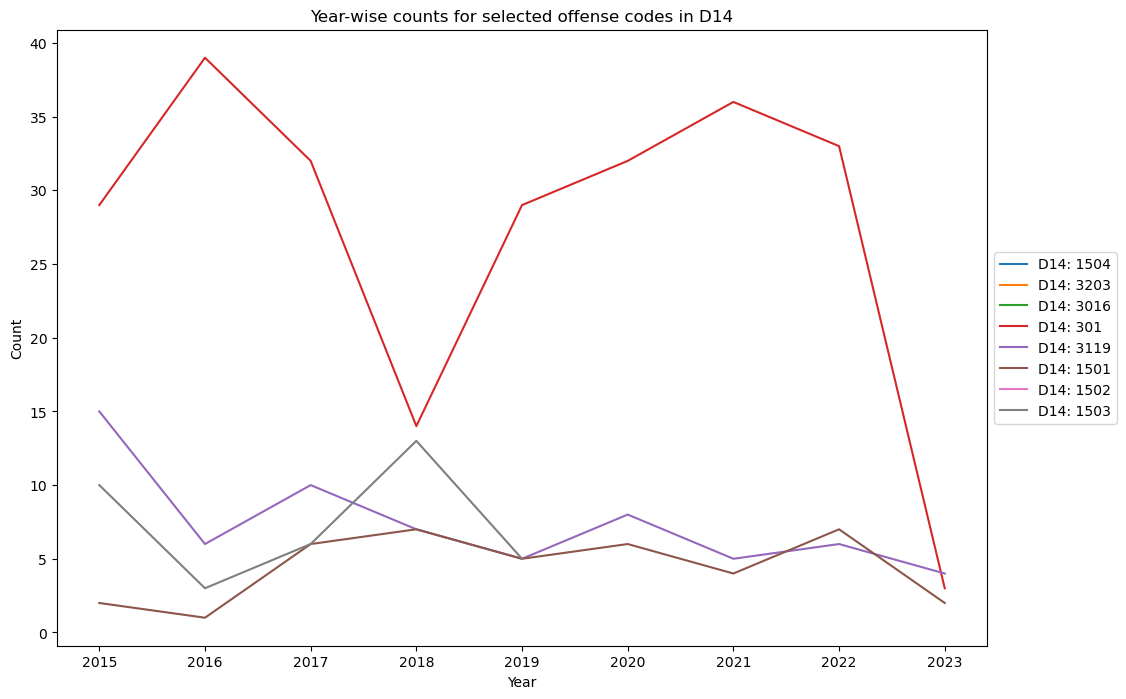

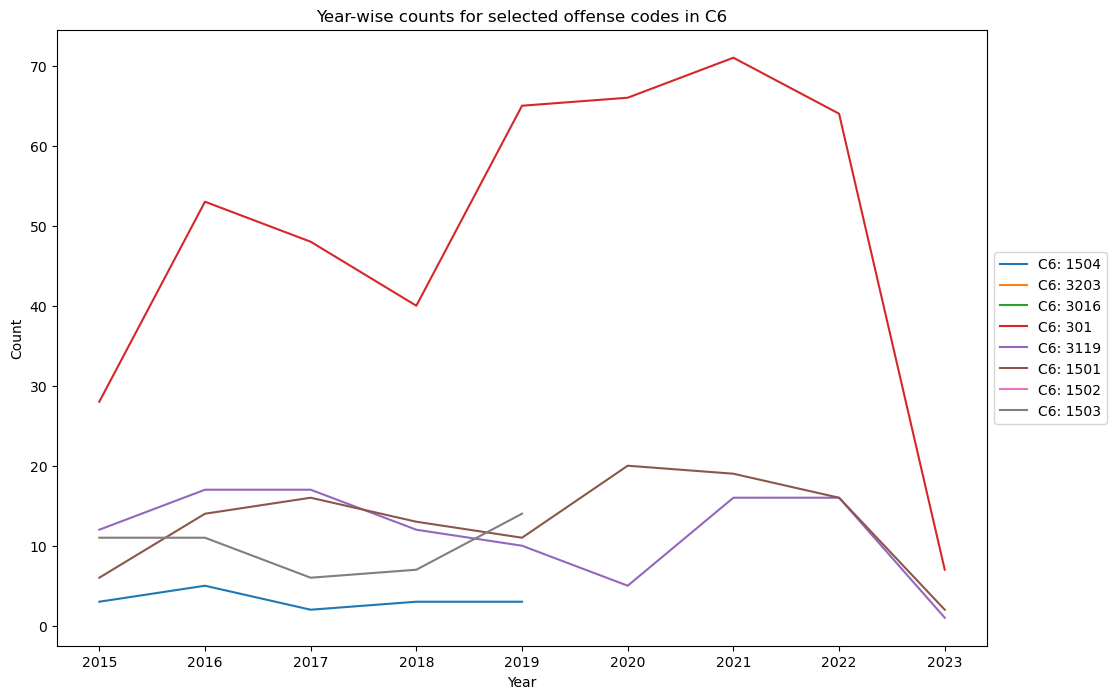

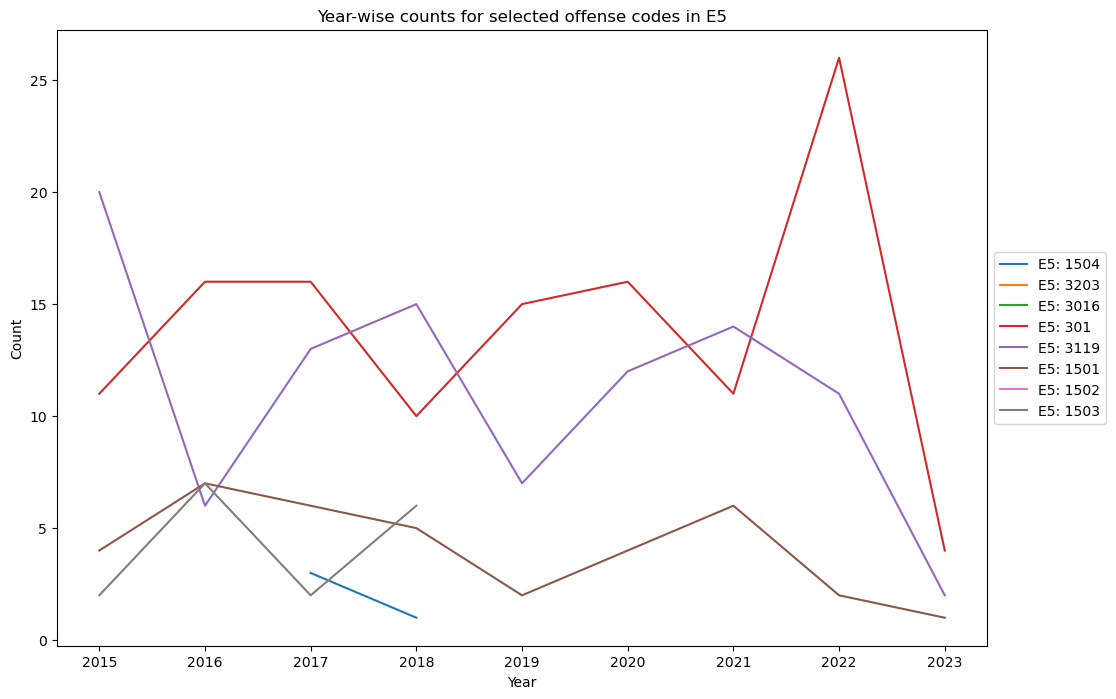

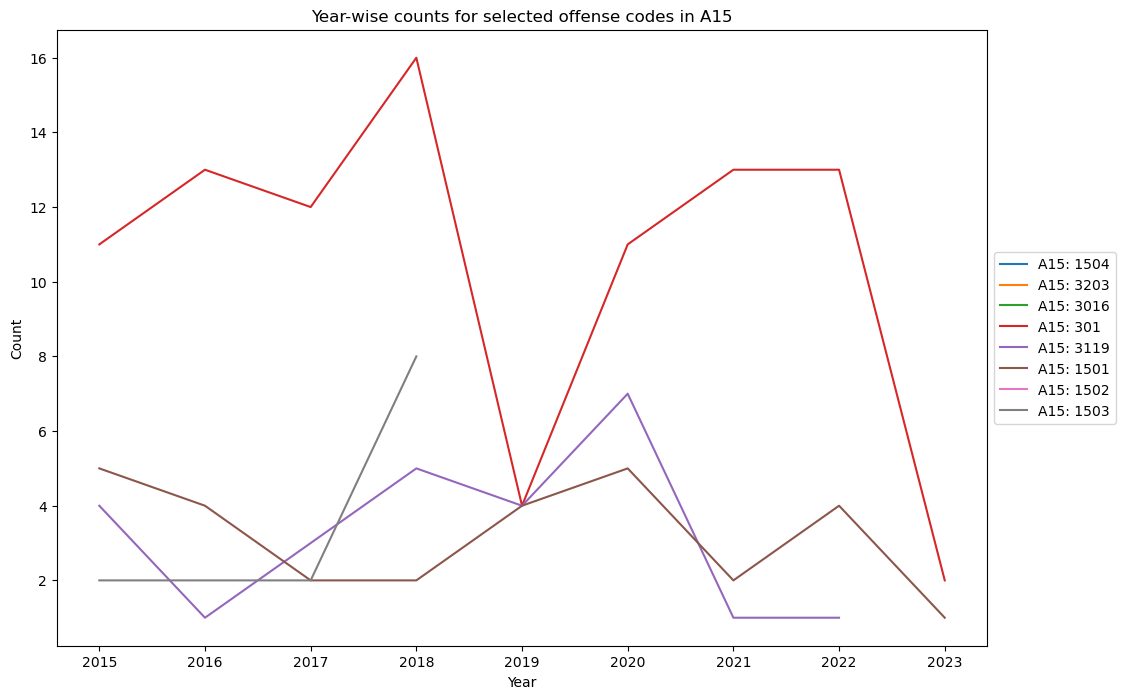

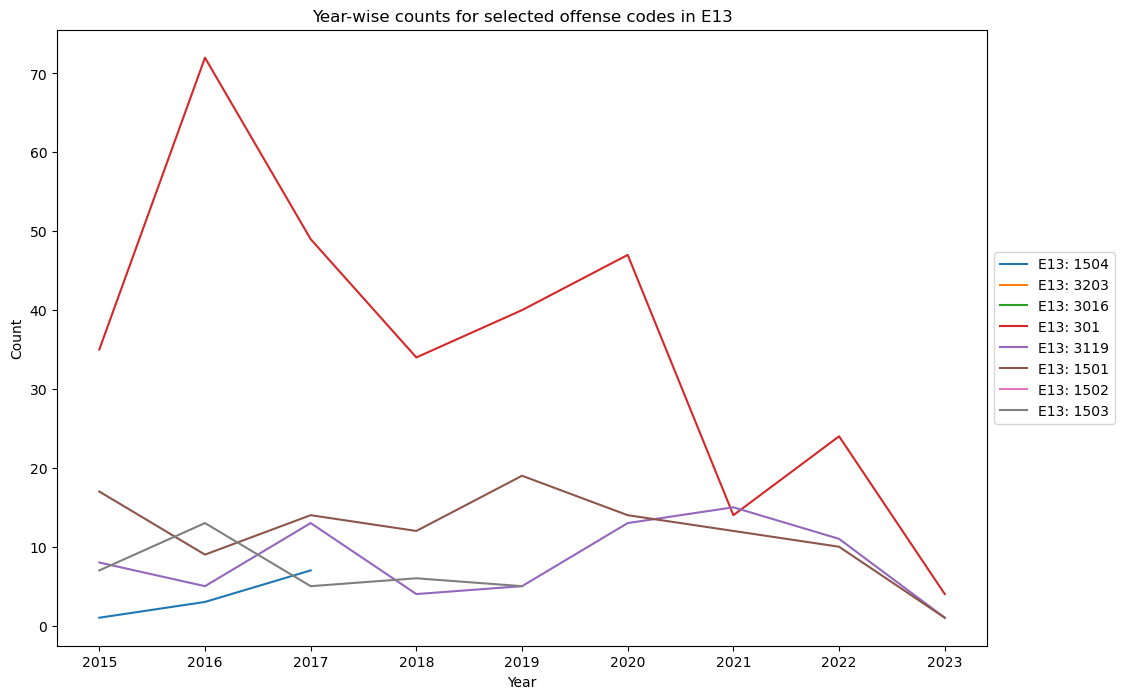

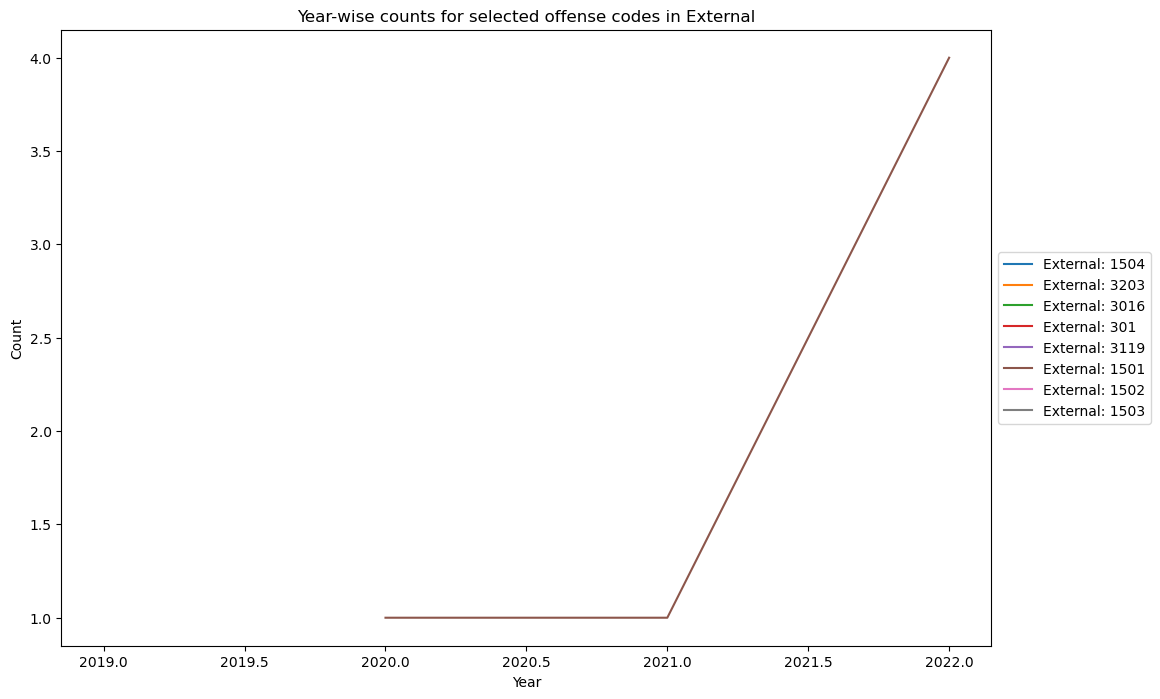

In [537]:
offense_codes_nd4 = [1504,3203,3016,301,3119,1501,1502,1503]

# Filter the DataFrame for the given offense codes
offense_df_nd4 = df_nd4[df_nd4['OFFENSE_CODE'].isin(offense_codes_nd4)]

# Group the DataFrame by district, year, and offense code, and count the number of occurrences
grouped_nd4 = offense_df_nd4.groupby(['DISTRICT', 'YEAR', 'OFFENSE_CODE']).size().reset_index(name='COUNT')

# Pivot the data to have each district as a separate column
pivoted_nd4 = grouped_nd4.pivot(index=['YEAR', 'OFFENSE_CODE'], columns='DISTRICT', values='COUNT')

# Loop over each district and create a line graph for each offense code
for district in df_nd4['DISTRICT'].unique():
    fig, ax = plt.subplots()
    for code in offense_codes_nd4:
        ax.plot(pivoted_nd4.loc[(slice(None), code), district].reset_index()['YEAR'], pivoted_nd4.loc[(slice(None), code), district].values, label=f"{district}: {code}")
    ax.set_title(f"Year-wise counts for selected offense codes in {district}")
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # Set the figure size
    plt.gcf().set_size_inches(12,8)
    #ax.legend()
    plt.show()


- The above graphs shows the line graph for the gun violence offense codes for the years from 2015 to 2023 in the various districts of city of Boston except for the district 4 locations. 
- The x-axis shows the years and the y-axis shows the count of offenses with different line colours depicting different offense codes. 

In [ ]:
#NOW COMPARING THE D4 DISTRICTS AND REST OF THE BOSTON

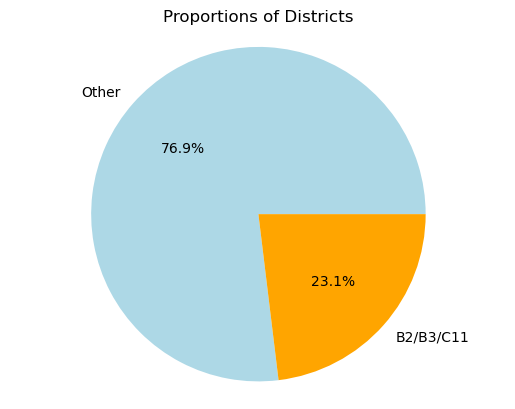

In [538]:
# Define a dictionary mapping districts to categories
category_dict = {'B2': 'B2/B3/C11', 'B3': 'B2/B3/C11', 'C11': 'B2/B3/C11'}
for district in district_counts.index:
    if district not in category_dict:
        category_dict[district] = 'Other'

# Group the districts by category and count the number of occurrences
category_counts = pd.Series(category_dict).value_counts()

# Create a list of colors for the pie chart
colors = ['lightblue', 'orange']

# Create a pie chart with proportions of each category
plt.pie(category_counts, labels=category_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Proportions of Districts')
plt.axis('equal')
plt.show()


- The above graph compares the district 4 with the rest of the city of boston.
- It shows the proportion of offences in district 4 locations which is 23.1% of the total offenses in the city of Boston. 

In [539]:
print(top_15_descriptions_d4)

       OFFENSE_CODE                          OFFENSE_DESCRIPTION
2              3201                              PROPERTY - LOST
4              2647                    THREATS TO DO BODILY HARM
16             3410                          TOWED MOTOR VEHICLE
30             3115                           INVESTIGATE PERSON
33             3114                         INVESTIGATE PROPERTY
35             1402                                    VANDALISM
37             3006                SICK/INJURED/MEDICAL - PERSON
60              619                           LARCENY ALL OTHERS
91             3831        M/V - LEAVING SCENE - PROPERTY DAMAGE
98              802                     ASSAULT SIMPLE - BATTERY
142            3301                               VERBAL DISPUTE
208            3502                     MISSING PERSON - LOCATED
267            3803               M/V ACCIDENT - PERSONAL INJURY
284            3802              M/V ACCIDENT - PROPERTY  DAMAGE
683             614      

In [466]:
print(top_15_descriptions_nd4)

       OFFENSE_CODE                    OFFENSE_DESCRIPTION
3              3115                     INVESTIGATE PERSON
9               614  LARCENY THEFT FROM MV - NON-ACCESSORY
12             1402                              VANDALISM
13              802               ASSAULT SIMPLE - BATTERY
15             3006          SICK/INJURED/MEDICAL - PERSON
24              619                     LARCENY ALL OTHERS
27              617            LARCENY THEFT FROM BUILDING
31             3201                        PROPERTY - LOST
40             3410                    TOWED MOTOR VEHICLE
41             3114                   INVESTIGATE PROPERTY
78             3301                         VERBAL DISPUTE
79             2647              THREATS TO DO BODILY HARM
89              613                    LARCENY SHOPLIFTING
106            3802        M/V ACCIDENT - PROPERTY  DAMAGE
145            3831  M/V - LEAVING SCENE - PROPERTY DAMAGE
18750           619              LARCENY OTHER $200 & OV

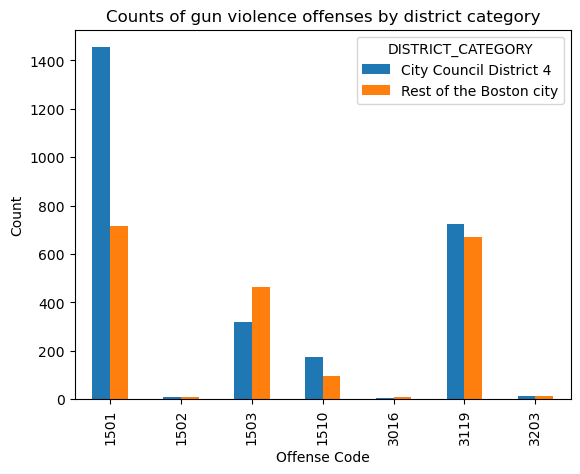

In [548]:
import matplotlib.pyplot as plt
import numpy as np

# Define the offense codes and districts of interest
offense_codes = [1501, 3119, 1510, 3016, 3203, 1503, 1502]
districts_cat1 = ['B2', 'B3', 'C11']

# Create a new column that categorizes the districts
df['DISTRICT_CATEGORY'] = np.where(df['DISTRICT'].isin(districts_cat1), 'City Council District 4', 'Rest of the Boston city')

# Filter the dataframe to include only the offense codes and districts of interest
df_filtered = df.loc[df['OFFENSE_CODE'].isin(offense_codes) & df['DISTRICT'].isin(districts_cat1 + ['A1', 'A7', 'B1', 'C6', 'C11', 'D4', 'D14', 'E5', 'E13', 'E18'])]

# Group the filtered dataframe by offense code and district category, and count the number of crimes
grouped = df_filtered.groupby(['OFFENSE_CODE', 'DISTRICT_CATEGORY']).size().reset_index(name='COUNT')

# Pivot the grouped dataframe to create a table with offense codes as rows, district categories as columns, and counts as values
pivoted = grouped.pivot(index='OFFENSE_CODE', columns='DISTRICT_CATEGORY', values='COUNT')

# Plot a bar graph with the pivoted dataframe
pivoted.plot(kind='bar')

# Set the title and axis labels
plt.title('Counts of gun violence offenses by district category')
plt.xlabel('Offense Code')
plt.ylabel('Count')

# Show the graph
plt.show()

- The above graph also compares the district 4 with the rest of the city of boston, specifically for the gun violence offences.
- It shows the number of offences for gun violence offence codes for the city council district 4 as well as for the rest of the boston city. 